In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Text(0.5, 1.0, 'Testing  datas')

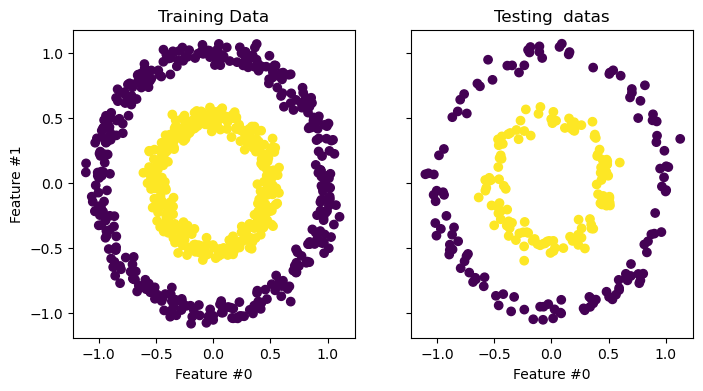

In [11]:
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
X,y = make_circles(n_samples=1000,factor=0.5,noise=0.05,random_state=0)
# 資料切割
#stratify=y 分層抽樣 每一類案y的樣子抽樣
"""
stratify=y：原始數據集（y）中有70%的數據是類別0，
和30%的數據是類別1，那麼使用stratify=y參數後，
訓練集和測試集中的數據也會儘量保持這個70%/30%的比例
"""
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y,random_state=0)
_,(train_ax,test_ax) = plt.subplots(ncols=2,sharex=True,sharey = True,figsize=(8,4))
train_ax.scatter(X_train[:,0],X_train[:,1],c = y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training Data")

test_ax.scatter(X_test[:,0],X_test[:,1],c=y_test)
test_ax.set_xlabel("Feature #0")
test_ax.set_title("Testing  datas")

## PCA 萃取特徵

In [18]:
from sklearn.decomposition import PCA,KernelPCA
pca = PCA(n_components=2)
"""
n_components 決定要保留多少個「主成分」當作新特徵。 None = 保留全部（通常比較浪費
kernel: 
常見選擇：
"linear"：就是一般 PCA。
"rbf"：高斯核，常用於抓非線性結構（像圓圈、月亮）。
"poly"：多項式核，會把資料映射成多項式關係。
想像每個點都放一個「光圈」：
gamma 小 → 光圈很大，彼此影響範圍大。
gamma 大 → 光圈很小，只影響附近。
fit_inverse_transform 是否學習「逆轉換」。
設 True → KernelPCA 會試著把低維資料「近似還原」回原始空間。    
alpha
作用：當做逆轉換時的正則化參數。
值越大 → 還原時更平滑（但可能失真）。
值越小 → 還原更接近原始資料（但可能過度擬合）。
"""
X_test_pca = pca.fit(X_train).transform(X_test)

Text(0.5, 1.0, 'PCA')

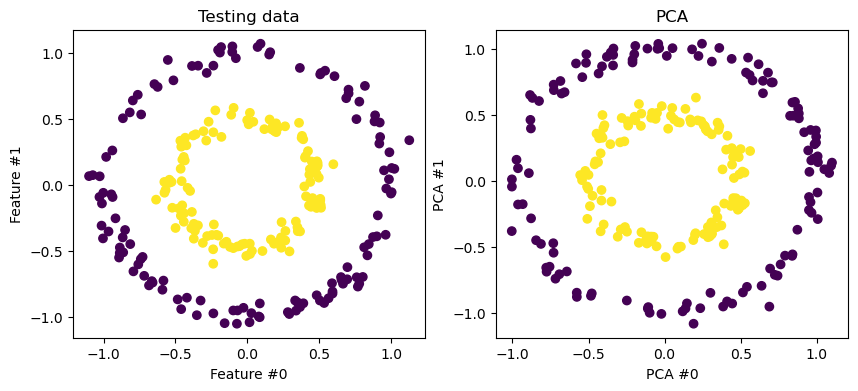

In [19]:
_,(orig_data_ax,pca_proj_ax) = plt.subplots(ncols=2,figsize=(10,4))
#ncols   產生 2 個子圖，橫向排列
orig_data_ax.scatter(X_test[:,0],X_test[:,1],c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

pca_proj_ax.scatter(X_test_pca[:,0],X_test_pca[:,1],c=y_test)
pca_proj_ax.set_ylabel("PCA #1")
pca_proj_ax.set_xlabel("PCA #0")
pca_proj_ax.set_title("PCA")


## KernelPCA 萃取特徵
kernel參數說明
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

linear：線性核。這實際上與普通的PCA相同。

poly：多項式核。這個核有額外的參數（如：多項式的程度、係數等）來控制多項式的特性。

rbf：半徑向基函數（Radial Basis Function）核。這是一個常用的核，適用於各種非線性問題。

sigmoid：S型核。這個核經常用在神經網絡和支持向量機中。

cosine：餘弦相似性核。這個核基於兩個向量之間的餘弦相似性。

precomputed：如果您已經計算了核矩陣，可以使用這個選項。

callable：如果你有一個自定義的核函數，你可以直接將其作為這個參數的值。



In [26]:
kernel_pca =  KernelPCA(n_components=None,kernel="rbf",gamma=10,fit_inverse_transform=True,alpha=0.1)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)

Text(0.5, 1.0, 'Kerne_Pca')

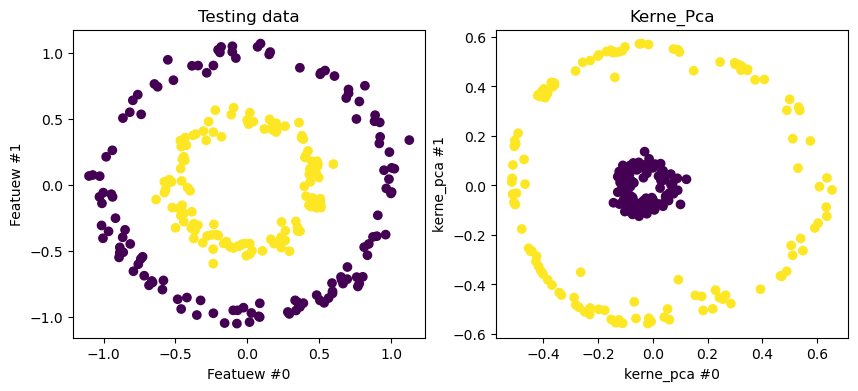

In [27]:
_,(orig_data_ax,kernel_pca_project_ax) = plt.subplots(ncols=2,figsize=(10,4))
orig_data_ax.scatter(X_test[:,0],X_test[:,1],c= y_test)
orig_data_ax.set_ylabel("Featuew #1")
orig_data_ax.set_xlabel("Featuew #0")
orig_data_ax.set_title("Testing data")


kernel_pca_project_ax.scatter(X_test_kernel_pca[:,0],X_test_kernel_pca[:,1],c=y_test)

kernel_pca_project_ax.set_ylabel("kerne_pca #1")
kernel_pca_project_ax.set_xlabel("kerne_pca #0")
kernel_pca_project_ax.set_title("Kerne_Pca")



Text(0.5, 1.0, 'Testing Data')

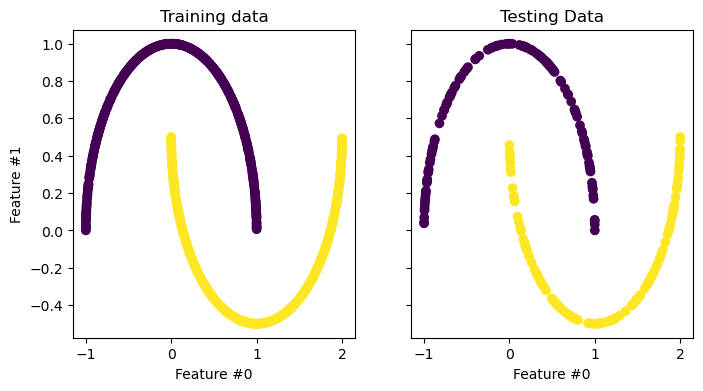

In [29]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X,y = make_moons(n_samples=1000,random_state=123)
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=0)
_,(train_ax,test_ax) = plt.subplots(ncols=2,sharex=True,sharey=True,figsize=(8,4))
train_ax.scatter(X_train[:,0],X_train[:,1],c=y_train)
train_ax.set_ylabel("Feature #1")
train_ax.set_xlabel("Feature #0")
train_ax.set_title("Training data")

test_ax.scatter(X_test[:,0],X_test[:,1],c=y_test)
test_ax.set_xlabel("Feature #0")
test_ax.set_title("Testing Data")


## PCA 萃取特徵

In [35]:
from sklearn.decomposition import PCA,KernelPCA
pca = PCA(n_components=2)
X_test_pca = pca.fit(X_train).transform(X_test)

Text(0.5, 1.0, 'PCA')

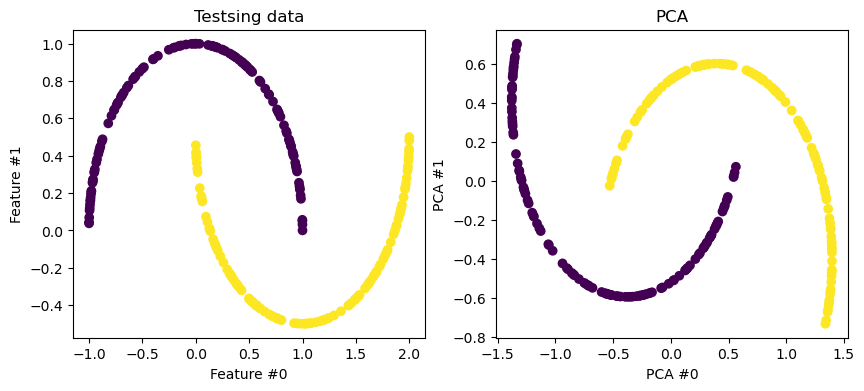

In [36]:
_,(orig_data_ax,pca_proj_ax) = plt.subplots(ncols=2,figsize = (10,4))
orig_data_ax.scatter(X_test[:,0],X_test[:,1],c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testsing data")

pca_proj_ax.scatter(X_test_pca[:,0],X_test_pca[:,1],c=y_test)
pca_proj_ax.set_ylabel("PCA #1")
pca_proj_ax.set_xlabel("PCA #0")
pca_proj_ax.set_title("PCA")

## KernelPCA 萃取特徵

In [38]:
from sklearn.decomposition import KernelPCA
kernel_pca = KernelPCA(n_components=None,kernel="rbf",gamma=15)
X_test_kernel_pca = kernel_pca.fit(X_train).transform(X_test)


Text(0.5, 1.0, 'Kernel PCA')

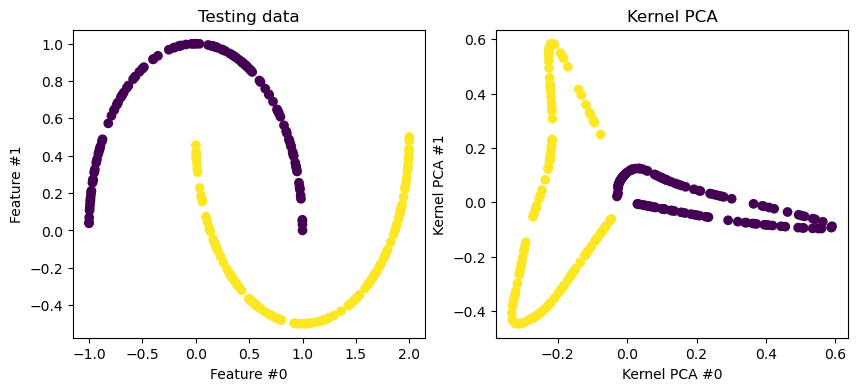

In [41]:
_,(orig_data_ax,kernel_pca_project_ax) = plt.subplots(ncols=2,figsize = (10,4))
orig_data_ax.scatter(X_test[:,0],X_test[:,1],c=y_test)
orig_data_ax.set_ylabel("Feature #1")
orig_data_ax.set_xlabel("Feature #0")
orig_data_ax.set_title("Testing data")

kernel_pca_project_ax.scatter(X_test_kernel_pca[:,0],X_test_kernel_pca[:,1],c = y_test)
kernel_pca_project_ax.set_ylabel("Kernel PCA #1")
kernel_pca_project_ax.set_xlabel("Kernel PCA #0")
kernel_pca_project_ax.set_title("Kernel PCA")

# Scikit-learn LDA實作

In [42]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [43]:
ds = datasets.load_wine()
df = pd.DataFrame(ds.data,columns=ds.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [44]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X = df.values
y = ds.target
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((142, 13), (36, 13), (142,), (36,))

In [45]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)

## 特徵萃取(LDA)

In [53]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y_train)
X_test_lda = lda.transform(X_test_std)
X_train_lda.shape,X_test_lda.shape

((142, 2), (36, 2))

In [54]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()

In [55]:
clf.fit(X_train_lda,y_train)

LogisticRegression()

In [57]:
y_pred = clf.predict(X_test_lda)
print(f"{accuracy_score(y_test,y_pred)*100:.2f}")

97.22


## 使用全部特徵

In [63]:
X,y = datasets.load_wine(return_X_y=True)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2)

X_train.shape,X_test.shape

((142, 13), (36, 13))

In [59]:
scaler = StandardScaler()
X_train_std = scaler.fit_transform(X_train)
X_test_std = scaler.transform(X_test)



In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
clf = LogisticRegression()
clf.fit(X_train_std,y_train)
y_pred = clf.predict(X_test_std)
print(f"{accuracy_score(y_test,y_pred)*100:.2f}")

97.22
